In [11]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_merge.csv', encoding='ANSI', index_col=[0])
df

,개업점포수,폐업점포수,총상주인구수,남성상주인구수,여성상주인구수,연령대10상주인구수,연령대20상주인구수,연령대30상주인구수,연령대40상주인구수,연령대50상주인구수,...,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,월매출평균,cluster
상권코드,,,,,,,,,,,,,,,,,,,,,
1000001,3,2,1768.600000,825.95,942.650000,258.250000,204.850000,250.650000,323.900000,271.900000,...,102972.55,8.840290e+04,17935.550000,31522.75,4.487895e+04,4.100945e+04,30224.650000,25805.750000,6.377865e+07,0
1000002,0,0,866.000000,388.75,477.250000,18.750000,386.000000,238.500000,83.500000,57.750000,...,200873.25,1.841512e+05,26299.500000,60064.00,7.056925e+04,6.342225e+04,67605.500000,97064.750000,4.564560e+07,0
1000003,8,4,1157.000000,658.75,498.250000,102.500000,159.250000,185.000000,202.150000,203.650000,...,73362.10,5.468335e+04,4434.750000,25811.80,2.669490e+04,2.546940e+04,22437.250000,21761.750000,2.371337e+07,0
1000004,10,6,1407.900000,701.75,706.150000,156.850000,433.000000,192.050000,166.000000,163.000000,...,160051.40,1.645984e+05,43480.550000,158987.60,3.297445e+04,3.097685e+04,25945.650000,32284.950000,9.412677e+07,0
1000005,4,1,1728.071429,844.00,884.071429,253.142857,243.357143,254.785714,304.571429,297.642857,...,29530.50,3.411836e+04,7446.785714,10600.00,8.738643e+03,1.051486e+04,10295.285714,16053.642857,6.265570e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001489,4,3,537.050000,271.60,265.450000,87.450000,78.800000,75.100000,91.400000,100.550000,...,74228.10,7.794670e+04,15416.100000,24008.85,2.563205e+04,2.904580e+04,30027.100000,28045.400000,2.988283e+07,0
1001491,11,5,6302.300000,2996.15,3306.150000,553.050000,856.350000,1193.100000,991.000000,1031.500000,...,928494.20,8.987231e+05,52502.800000,694293.00,4.753233e+05,2.657658e+05,192625.400000,146706.150000,1.331331e+07,0
1001493,26,17,2094.050000,1069.70,1024.350000,189.100000,342.500000,398.000000,315.200000,387.650000,...,1479535.25,1.395455e+06,89880.750000,614806.55,7.454046e+05,5.716893e+05,489635.600000,363572.600000,5.334804e+06,0


In [12]:
cols=['점포수', '월매출평균']
df = df[cols]
df.sort_values(by='월매출평균')

,점포수,월매출평균
상권코드,,
1000047,1.00,2.692136e+06
1001141,6.70,3.183234e+06
1000060,3.40,3.366625e+06
1001494,9.95,3.388149e+06
1001495,21.95,3.425120e+06
...,...,...
1000456,0.00,7.799924e+08
1000765,0.00,8.987870e+08
1001106,0.00,9.082907e+08


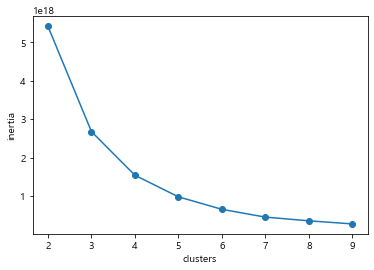

In [13]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
clusters=range(2,10) #군집개수 2~10
# inertia : 군집의 중심좌표와 각 샘플의 거리를 합산한 값 
inertias=[] 
for n in clusters:
    model=KMeans(n_clusters=n, random_state=0)
    model.fit(df)
    inertias.append(model.inertia_) 

plt.plot(clusters, inertias, '-o')    
plt.ylabel('inertia')
plt.xlabel('clusters')
plt.show()
#엘보우 포인트 확인

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
model.fit(df)
pred = model.predict(df)

In [15]:
X=df.iloc[:,:-2] #독립변수
# y=df['sale_result'] #종속변수
# y.value_counts()

In [16]:
df['cluster'] = model.predict(df)
# a.shape

In [17]:
print('제1상권지역 : 월평균매출', df[df['cluster']==2]['월매출평균'].min(),'원 부터', df[df['cluster']==2]['월매출평균'].max(), '까지', len(df[df['cluster']==2]), '개')
print('제2상권지역 : 월평균매출', df[df['cluster']==1]['월매출평균'].min(),'원 부터', df[df['cluster']==1]['월매출평균'].max(), '까지', len(df[df['cluster']==1]), '개')
print('제3상권지역 : 월평균매출', df[df['cluster']==0]['월매출평균'].min(),'원 부터', df[df['cluster']==0]['월매출평균'].max(), '까지', len(df[df['cluster']==0]), '개')


제1상권지역 : 월평균매출 419885307.65 원 부터 1063667246.2631578 까지 23 개
제2상권지역 : 월평균매출 128966467.40950003 원 부터 397988520.56000006 까지 216 개
제3상권지역 : 월평균매출 2692135.75 원 부터 127985194.6625 까지 938 개


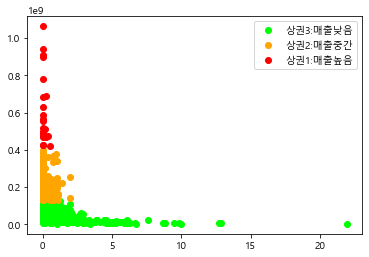

In [18]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import numpy as np 
import mglearn
from sklearn.datasets import make_blobs 
from sklearn.cluster import AgglomerativeClustering

x,y=make_blobs(random_state=0) #랜덤 데이터셋
#계층적 군집화 n_clusters 군집 개수 
agg=AgglomerativeClustering(n_clusters=3)
assign=agg.fit_predict(df)  #학습 및 군집을 나눔 
# print(assign)
# print(assign.shape)
a=assign.reshape(-1,1) #2차원 형태로 변환
#print(a.shape)
x1=np.hstack([df,a]) #x 배열에 추가
#print(x1)
x_0=x1[x1[:,2]==0,:] # 군집 0
x_1=x1[x1[:,2]==1,:] # 군집 1 
x_2=x1[x1[:,2]==2,:] # 군집 2 
plt.scatter(x_0[:,0], x_0[:,1], c='lime')
plt.scatter(x_1[:,0], x_1[:,1], c='orange')
plt.scatter(x_2[:,0], x_2[:,1], c='red')
plt.legend(['상권3:매출낮음', '상권2:매출중간', '상권1:매출높음'])
plt.show()

In [19]:
df=df[['cluster']]
df

,cluster
상권코드,
1000001,0
1000002,0
1000003,0
1000004,0
1000005,0
...,...
1001489,0
1001491,0
1001493,0


In [20]:
df.to_csv('c:/data/convenience/temp/cluster.csv', encoding='ANSI')